<a href="https://colab.research.google.com/github/TanachaiAnakewat/DataMining2022/blob/main/ex9_Tanachai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX9 Logistic Regression

Points
- Q1 2
- Q2 5
- Q3 3


In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot  as plt
%matplotlib inline

In [2]:
# Colaboratoryでは以下を実行して必要なファイルをダウンロード
!wget https://raw.githubusercontent.com/UTDataMining/2022A/master/ex8/iris.csv

--2022-12-09 04:53:27--  https://raw.githubusercontent.com/UTDataMining/2022A/master/ex8/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716 (3.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.63K  --.-KB/s    in 0s      

2022-12-09 04:53:27 (33.8 MB/s) - ‘iris.csv’ saved [3716/3716]



The following scatterplot shows the flowers `versicolor` and `virginica` in the `petal_length` and `petal_width` feature space of the iris dataset. The two flower types are characterized differently in this feature space.

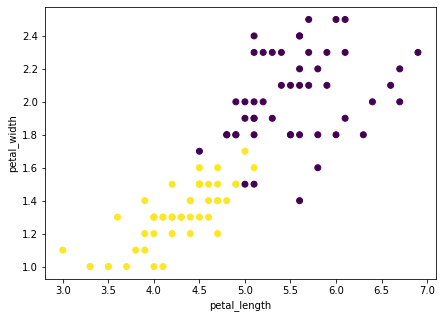

In [3]:
iris = pd.read_csv('iris.csv')
X=iris[(iris['species']=='versicolor')| (iris['species']=='virginica')][['petal_length', 'petal_width']].values
y=iris[(iris['species']=='versicolor')| (iris['species']=='virginica')][['species']].values
y = (y=='versicolor').astype(int) # versicolorを1、virginicaを0に

plt.figure(figsize=(7,5))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(X[:,0], X[:,1], c=y[:,0]);

In the following, let us consider learning the parameters of our hypothetical function to predict the flower label `versicolor` or `virginica` from  the features `petal_width` and `petal_length` using logistic regression.

First, let the features `petal_length` and `petal_width` be an input $X$ and let the flower label `versicolor` or `virginica` be an output $y$. As a preparation, consider normalizing the features and adding a bias term ($x_0=1$) by inserting a column vector with elements of 1 in the first column of `X`. 

As a result, we now have $X$ ($m \times 3$) and $y$ ($m \times 1$) for our input and output data respectively.


In [4]:
X_norm=(X-np.mean(X, axis=0))/np.std(X, axis=0) # 標準化
X_norm = np.hstack([np.ones((X.shape[0],1)), X_norm]) # バイアス項の追加

## Q1 Sigmoid function

The sigmoid function $g(z)$ is defined as follows

$g(z)=\frac{1}{1+e^{-z}}$

Complete the `sigmoid` function that takes as input an array `Z` of any length with real values as elements and returns an array whose elements are the values of the sigmoid function for each element of the input array.

[numpy.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)



In [5]:
def sigmoid(Z):
    Z = Z.astype(float) # float型にしておく
    return 1/(1+np.exp(-Z))

Once the `sigmoid` function is complete, run the following cell. Your function should return an arrary `[0.26..., 0.5, 0.73...]`.

In [6]:
sigmoid(np.array([-1,0,1]))

array([0.26894142, 0.5       , 0.73105858])

## Q2 Gradient descent

In the following, we implement the `graddes_logit` function that learns the parameters of a hypothetical function for logistic regression using the gradient descent method. 

The `graddes_logit` function takes the input data (number of data ($m$)$\times$(number of features + bias)($n$)), the output data ($m\times1$), the learning rate, and the number of training iterations (each iteration is called an epoch) with the arguments `X`, `y`, `alpha`, and `n_iter` respectively.

The `graddes_logit` function learns the parameters and then returns:
- A list consisting of the costs of each iteration
- An array of the parameters ($n\times1$)

#### Model training
Let parameters be

$\theta=(\theta_0, \theta_1, ..., \theta_{n-1})^T$,

a hypothetical function (model) be

$h(x)=g(\theta_0+\theta_1x_1+\theta_2x_2+....+\theta_{n-1}x_{n-1})=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$,

an input be

$
  X = \left(
    \begin{array}{cccc}
      x_0^{(1)} &   x_1^{(1)} & ... &   x_{n-1}^{(1)}  \\
      ... & ...& ...&...\\
      x_0^{(m)} &  x_1^{(m)} & ... &   x_{n-1}^{(m)}  \\
    \end{array}
  \right)
$

(where $x_0^{(i)}=1$),

and an output be

$y=(y^{(1)}, y^{(2)}, ..., y^{(m)})^T$.

Given the following cost function

$J(\theta)=-\frac{1}{m}\Sigma_{i=1}^{m}(y^{(i)}log(h(x^{(i)}))+(1-y^{(i)})log(1-h(x^{(i)})))$

we update the parameter $\theta_j$ corresponding the feature $x_j$ of $X$ using the gradient descent method as follows:

$\theta_j:= \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j} =  \theta_j - \frac{\alpha}{m} \Sigma_{i=1}^m ((h(x^{(i)})-y^{(i)})x^{(i)}_j)$


The entire parameters can also be updated at once as follows:


$\theta := \theta - \frac{\alpha}{m}X^T(g(X\theta)-y)$

When we have one feature as the input, the parameters are updated as follows:

$\theta_0 := \theta_0 - \frac{\alpha}{m}\Sigma_{i=1}^m (h(x^{(i)})-y^{(i)})$ 

(the parameter for a bias term)

$\theta_1 := \theta_1 - \frac{\alpha}{m}\Sigma_{i=1}^m ((h(x^{(i)})-y^{(i)})x^{(i)})$

(the parameter for the input feature)

The `graddes_logit` function learns the parameters according to the following procedure.

- Repeat the following procedure `n_iter` times    
     - For all m data
        - Calculate the output of the hypothesis function $h(x^{(i)})$ for $x^{(i)}$.  
        - Calculate the error $h(x^{(i)})-y^{(i)}$ with $y^{(i)}$.
     - Calculate the cost $J(\theta)$ using the errors of all m data and append it to `costs`.
     - Update `w` with the parameters $\theta_j(j=0,. ,n-1)$ using the errors of all m data,
          - `w[0,0]`$:=$(parameter $\theta_0$ for $x_0$), 
          - ... ,
          - `w[n-1,0]`$:=$(parameter $\theta_{n-1}$ for $x_{n-1}$)

Return `costs` and `w` after all the iterations have been completed.
 
Complete the `graddes_logit` function according to the above procedure.

In [24]:
def graddes_logit(X, y, alpha, n_iter):  
    m = X.shape[0] # データ数
    n =  X.shape[1] # 次元（特徴量+バイアス）数
    
    costs=[] # エポックごとのコスト関数の値を入れるリスト
    w = np.zeros((n,1)) #  バイアスと各特徴量に対するパラメータ（重み）の初期化
    
    for i in range(n_iter):
      cost = 0
      errors = []
      for j in range(m):
        h = sigmoid(np.dot(np.transpose(w),X[j]))
        error = h - y[j]
        errors.append(error)
        cost += y[j]*np.log(h)+(1-y[j])*np.log(1-h)
      costs.append(-cost/m)

      for j in range(n):
        for k in range(m):
          w[j][0] -= (alpha * errors[k] * X[k][j])/m
        
    return costs, w

In [22]:
w = np.zeros((2,1))
w[1][0] = 1
w

array([[0.],
       [1.]])

Once the `graddes_logit` is complete, run the following cell. Your function should return the cost $\simeq 0.199$.


[0.19912466]
[[-0.02318852]
 [-1.28885231]
 [-1.41169382]]


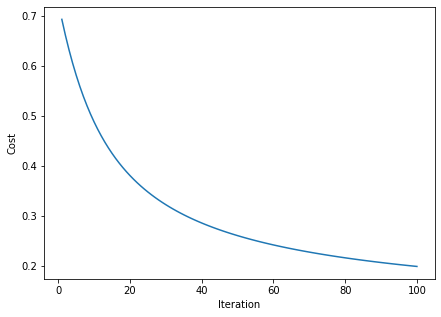

In [25]:
a=0.1 # 学習率
n=100 # 繰り返し回数
costs, w = graddes_logit(X_norm, y, a, n)
print(costs[-1])
print(w)
plt.figure(figsize=(7,5))
plt.plot(range(1,n+1),costs) # 繰り返しとコスト関数のプロット
plt.ylabel('Cost')
plt.xlabel('Iteration');

Let us visualize the decision boundary for classifying two flower types, `versicolor` or `virginica`, from two features, `petal_length` and `petal_width`.


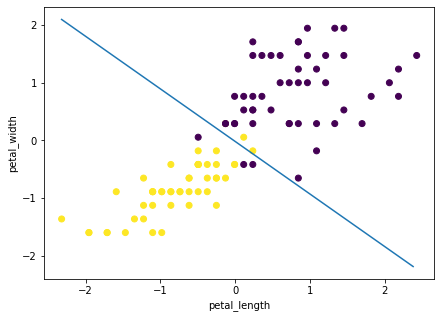

In [26]:
plt.figure(figsize=(7,5))
x1=np.arange(X_norm[:,1].min(),X_norm[:,1].max(),0.1)
plt.plot(x1, -(w[1,0]*x1+w[0,0])/w[2,0])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(X_norm[:,1], X_norm[:,2],c=y[:,0]);

The line where $y=0.5$ on the following sigmoid surface is the decision boundary above, where the sigmoid funciton is $y=\frac{1}{1+e^{-(\theta_0+\theta_1x_1+\theta_2x_2)}}$ ($x_1$:`petal_length`and $x_2$:`petal_width`).

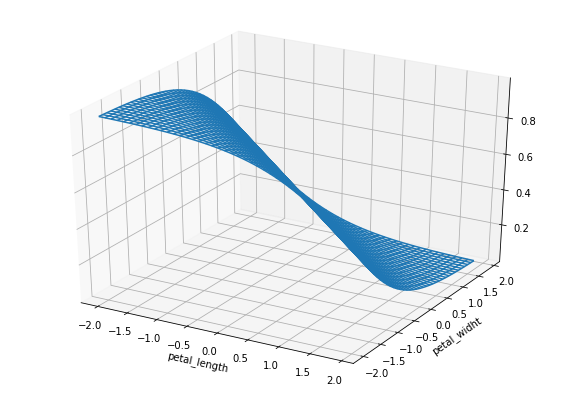

In [27]:
from mpl_toolkits.mplot3d import Axes3D

X1, X2 = np.meshgrid(np.arange(-2.0, 2.0, 0.1), np.arange(-2.0, 2.0, 0.1))
Z = sigmoid(w[0,0]+w[1,0]*X1+ w[2,0]*X2)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("petal_length")
ax.set_ylabel("petal_widht")
ax.plot_wireframe(X1, X2, Z);

## Q3 Evaluation
In the following, we load the titanic dataset `'titanic.csv'`. Cosider training a logistic regression model to predict whether a passenger is survived or not (`Survived`) given his or her features (`Pclass` (cabin grade), `Fare` (fare), `Age` (age) and `Sex` (gender)).


In [31]:
# Colaboratoryでは以下を実行して必要なファイルをダウンロード
!wget https://raw.githubusercontent.com/UTDataMining/2022A/master/ex9/titanic.csv

--2022-12-09 06:03:46--  https://raw.githubusercontent.com/UTDataMining/2022A/master/ex9/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.01s   

2022-12-09 06:03:47 (4.34 MB/s) - ‘titanic.csv’ saved [44225/44225]



In [32]:
df = pd.read_csv('titanic.csv')
df[['Pclass','Fare','Age','Sex','Survived']].head()

,Pclass,Fare,Age,Sex,Survived
0,3,7.2500,22.0,male,0
1,1,71.2833,38.0,female,1
2,3,7.9250,26.0,female,1
3,1,53.1000,35.0,female,1
4,3,8.0500,35.0,male,0


Consider applying label encoding to `Sex` feature.

In [33]:
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df[['Pclass','Fare','Age','Sex','Survived']].head()

,Pclass,Fare,Age,Sex,Survived
0,3,7.2500,22.0,0,0
1,1,71.2833,38.0,1,1
2,3,7.9250,26.0,1,1
3,1,53.1000,35.0,1,1
4,3,8.0500,35.0,0,0


Consider training a logistic regression model using the function in Q2.

[0.45198722]
[[-0.63051179]
 [-0.96699346]
 [ 0.04773453]
 [-0.45298281]
 [ 1.22247224]]


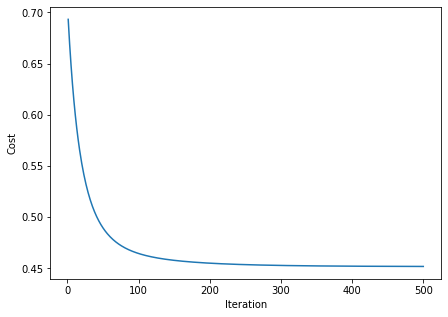

In [34]:
X = df[['Pclass','Fare','Age','Sex']].values
y = df[['Survived']].values

X_norm=(X-np.mean(X, axis=0))/np.std(X, axis=0) # 標準化
X_norm=np.insert(X_norm, 0, np.ones((1,X.shape[0]), dtype=int), axis=1) # バイアス項の追加

a=0.1 # 学習率
n=500 # 繰り返し回数
costs, w = graddes_logit(X_norm, y, a, n)

print(costs[-1]) # 最終的なコストの値
print(w) # パラメータ

# 繰り返しとコスト関数のプロット
plt.figure(figsize=(7,5))
plt.plot(range(1,n+1),costs) 
plt.ylabel('Cost')
plt.xlabel('Iteration');

Complete the following `evaluation` function that takes an array `y` (a column vector) containing the actual label values and an array `y_pred` (similar shape to `y`) containing the predicted label values as its first and second arguments, respectively, and returns (accuracy, precision, recall, f value) regarding class label `1`.


In [37]:
def evaluation(y, y_pred):
    TP = 0
    FN = 0
    FP = 0
    TN = 0
    for i in range(len(y)):
      if y[i] == 1 and y_pred[i] == 1:
        TP +=1
      elif y[i] == 1 and y_pred[i] == 0:
        FN +=1
      elif y[i] == 0 and y_pred[i] == 1:
        FP +=1
      elif y[i] == 0 and y_pred[i] == 0:
        TN +=1
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1 = 2*precision*recall/(precision+recall)
    return accuracy, precision, recall, f1

Once the `evaluation` function is complete, run the following cell.

Your function should return `(0.80... 0.75... 0.71... 0.73...)`.

In [38]:
output = sigmoid(np.dot(X_norm, w))
y_pred = (output>=0.5).astype(int) 
evaluation(y, y_pred)

(0.8027057497181511, 0.7585139318885449, 0.716374269005848, 0.736842105263158)

The following scikit-learn functions also give above evaluation metrics.

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score

print(confusion_matrix(y, y_pred)) # 混同行列
print(accuracy_score(y, y_pred)) # accuracy
print(precision_score(y, y_pred)) # precision
print(recall_score(y, y_pred)) # recall
print(f1_score(y, y_pred))  # f値

[[467  78]
 [ 97 245]]
0.8027057497181511
0.7585139318885449
0.716374269005848
0.736842105263158


## Code Testing


In [28]:
## Run this cell first
!pip install prog_edu_assistant_tools
import re
import sys
import jinja2
from IPython.core import display
from google.colab import _message as google_message
from prog_edu_assistant_tools.magics import report, autotest, CaptureOutput
from prog_edu_assistant_tools.check import Check

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.4 MB/s 


## Q1

In [29]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q1')

## Q2

In [30]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q2')

## Q3

In [40]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q3')